<a href="https://colab.research.google.com/github/njonou65/UE-INF3236/blob/main/TP_5_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **TP5 NEURAL NETWORK**

#### Groupe 7 
    ####-NJONOU GABY 19M2347
    #### -MOUASSOM FERNAND 12W0902
    #### -FONE SIMO MERLIN 19M2382
    #### -EVINA KENNE RANDY  19M2456

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/github/UE-INF3236/

/content/drive/MyDrive/github/UE-INF3236


In [ ]:
%pylab inline
import os
import numpy as np
import pandas as pd
from imageio import imread # j'ai remplacer scipy par imageio par rapport a un probleme de version 
from sklearn.metrics import accuracy_score

import tensorflow as tf
import keras


Populating the interactive namespace from numpy and matplotlib


In [ ]:

#Définissons une valeur de départ, afin que nous puissions contrôler le caractère aléatoire de nos modèles
seed = 128
rng = np.random.RandomState(seed)


# ÉTAPE 1 : Chargement et prétraitement des données

In [ ]:
# on lit nos donnees test et train
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

sample_submission = pd.read_csv('sample_submission.csv')

train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


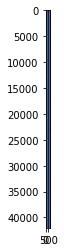

       label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
41995      0       0       0       0       0       0       0       0       0   
41996      1       0       0       0       0       0       0       0       0   
41997      7       0       0       0       0       0       0       0       0   
41998      6       0       0       0       0       0       0       0       0   
41999      9       0       0       0       0       0       0       0       0   

       pixel8  ...  pixel774  pixel775 

In [ ]:
#Nous lisons notre image et l’affichons.
from matplotlib import pyplot as plt
plt.imshow(train)
plt.show()

print(train)


In [ ]:
#On stok nos images dans un  veteur numpy
temp = []
for img_name in train:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'train', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
train_x = np.stack(temp)

train_x /= 255.0
train_x = train_x.reshape(-1, 784).astype('float32')

temp = []
for img_name in test.filename:
    image_path = os.path.join(data_dir, 'Train', 'Images', 'test', img_name)
    img = imread(image_path, flatten=True)
    img = img.astype('float32')
    temp.append(img)
    
test_x = np.stack(temp)

test_x /= 255.0
test_x = test_x.reshape(-1, 784).astype('float32')
train_y = keras.utils.np_utils.to_categorical(train.label.values)

# ETAPE 2.Chargement et prétraitement des données

In [ ]:
train = pd.read_csv(os.path.join(data_dir, 'Train', 'train.csv'))
test = pd.read_csv(os.path.join(data_dir, 'Test.csv'))

sample_submission = pd.read_csv(os.path.join(data_dir, 'Sample_Submission.csv'))

train.head()
#Nous lisons notre image et l’affichons.
